In [2]:
#deaths change by time
#necesarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
import random

# Cleaning, transforming and visualizing

## Data Wrangling:Exploratory Data Analysis
### Ensure that in doing so, NAN values are dealt with appropriately

In [3]:
#restauran revenue test and train data prediction data with 
RestaurantRevenueTrain=pd.read_csv('train.csv')
RestaurantRevenueTest=pd.read_csv('test.csv')

Data fields

Id : Restaurant id.
Open Date : opening date for a restaurant
City : City that the restaurant is in. Note that there are unicode in the names.
City Group : Type of the city. Big cities, or Other.
Type : Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
P1, P2 - P37 : There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
Revenue : The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values.

In [4]:
RestaurantRevenueTrain.sample(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
12,12,02/28/2013,Ankara,Big Cities,IL,2,2.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,1734634.0
99,99,12/18/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,1.0,5,5,4,2,5,5,5,3,13575224.0
23,23,06/03/2009,Sakarya,Other,FC,2,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2999068.0
21,21,01/25/2014,İstanbul,Big Cities,FC,5,5.0,4.0,4.0,2,...,1.0,0,0,0,0,0,0,0,0,1149870.0
34,34,03/21/2012,İstanbul,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,4100886.0
53,53,03/29/2013,Samsun,Other,FC,3,4.0,4.0,3.0,1,...,3.0,0,0,0,0,0,0,0,0,5595267.0
62,62,11/15/2010,Sakarya,Other,FC,2,4.0,4.0,4.0,2,...,3.0,1,1,3,2,3,1,3,3,5286212.0
106,106,06/15/2008,Antalya,Other,FC,3,3.0,6.0,6.0,4,...,7.5,0,0,0,0,0,0,0,0,4888774.0
86,86,07/26/2011,Bursa,Other,FC,3,3.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,3351383.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [5]:
RestaurantRevenueTrain.shape

(137, 43)

In [6]:
RestaurantRevenueTrain.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

In [7]:
#count empty cells
RestaurantRevenueTrain.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [8]:
RestaurantRevenueTrain.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [9]:
#sort by city name, and show city,open date,revenue,, just for practice
rev_date_city_sorted=RestaurantRevenueTrain.sort_values(by=['City'],ascending=True)[['revenue','Open Date','City']]

In [10]:
#month names,i might use this
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']

In [11]:
rev_date_city_sorted['Open Date']=pd.to_datetime(rev_date_city_sorted['Open Date'],format='%m%d%Y', infer_datetime_format=True)

1-TASK:Create new attribute called "Age" which means how long have the restaunrant opened

In [12]:
rev_date_city_sorted=rev_date_city_sorted.sort_values(['City', 'Open Date'])
rev_date_city_sorted=rev_date_city_sorted.reset_index(drop=True)
rev_date_city_sorted=rev_date_city_sorted.drop(['index'],axis=1)
rev_date_city_sorted

KeyError: "['index'] not found in axis"

In [ ]:
RestaurantRevenueTrain=RestaurantRevenueTrain.drop(['Id'],axis=1)

In [13]:
RestaurantRevenueTrain.reset_index(inplace = True,drop = True)

if we want to convert all data types of spesifik names:

In [ ]:
#longway
#RestaurantRevenueTrain.loc[:, RestaurantRevenueTrain.columns.str.startswith('P')]=RestaurantRevenueTrain.loc[:, RestaurantRevenueTrain.columns.str.startswith('P')].astype('int64')

In [ ]:
#shortway 
'''
for floatcol in RestaurantRevenueTrain.loc[:, RestaurantRevenueTrain.columns.str.startswith('P')]:
    RestaurantRevenueTrain[floatcol] = RestaurantRevenueTrain[floatcol].astype('int64')
'''

we don't need this line

investigate decimals of float type columns to see if there is an irregularity by selecting float dtypes

In [14]:
#select only float type columns just for practice
p_vals=RestaurantRevenueTrain.select_dtypes(float).sample(10)
p_vals.reset_index(inplace = True,drop = True)

In [15]:
RestaurantRevenueTrain.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

we can also try converting only float type data or convert_dtypes method which Convert columns to best possible dtypes using dtypes supporting pd.NA

In [16]:
#select only 'P' columns usin .loc
p_cols=RestaurantRevenueTrain.loc[:, RestaurantRevenueTrain.columns.str.startswith('P')]

In [42]:
RestaurantRevenueTrain[p_cols.columns].describe().round(2)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,...,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,4.01,4.41,4.32,4.37,2.01,3.36,5.42,5.15,5.45,5.49,...,3.22,3.14,2.73,1.94,2.53,1.14,2.49,2.03,2.21,1.12
std,2.91,1.51,1.03,1.02,1.21,2.13,2.30,1.86,1.83,1.85,...,2.31,1.68,5.54,3.51,5.23,1.70,5.17,3.44,4.17,1.79
min,1.00,1.00,0.00,3.00,1.00,1.00,1.00,1.00,4.00,4.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,4.00,4.00,4.00,1.00,2.00,5.00,4.00,4.00,5.00,...,2.00,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3.00,5.00,4.00,4.00,2.00,3.00,5.00,5.00,5.00,5.00,...,2.50,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,4.00,5.00,5.00,5.00,2.00,4.00,5.00,5.00,5.00,5.00,...,4.00,3.00,4.00,3.00,3.00,2.00,3.00,4.00,3.00,2.00
max,12.00,7.50,7.50,7.50,8.00,10.00,10.00,10.00,10.00,10.00,...,12.50,7.50,25.00,15.00,25.00,6.00,24.00,15.00,20.00,8.00


### what is problem here why it is not frawing subplots as i want

C:\Users\toshiba\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


ValueError: num must be 1 <= num <= 25, not 26

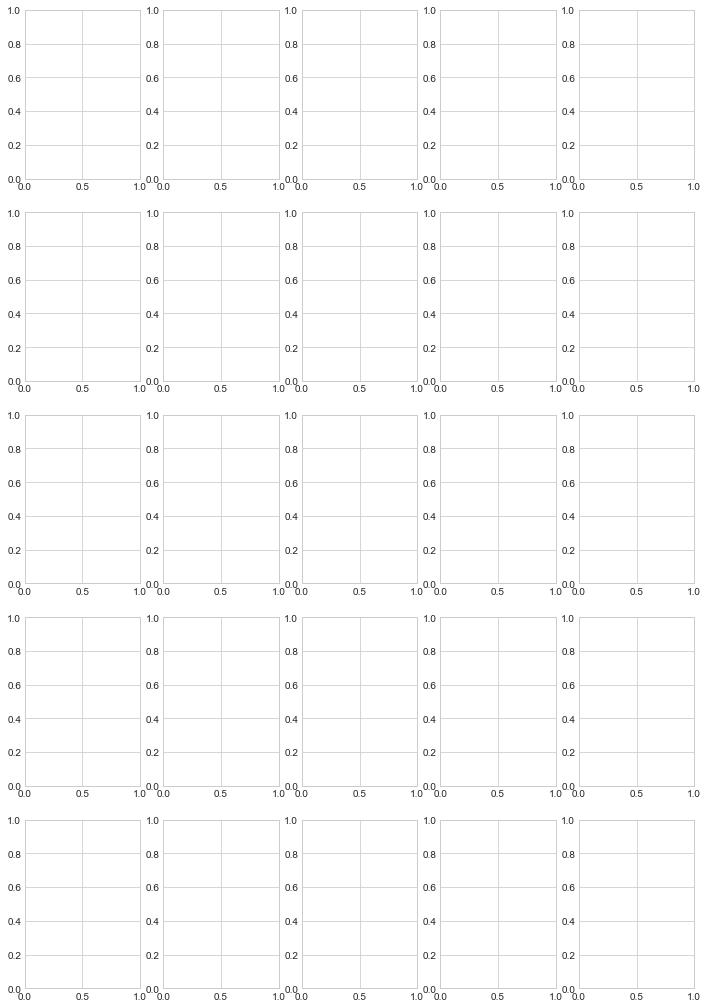

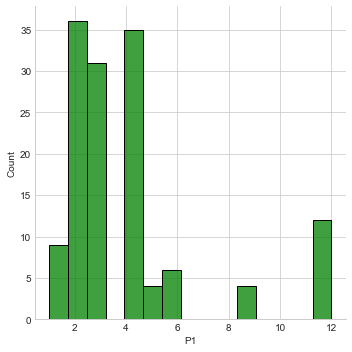

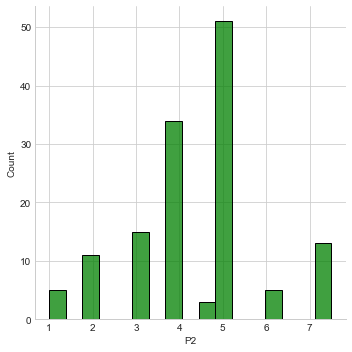

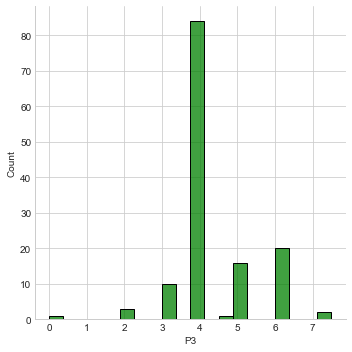

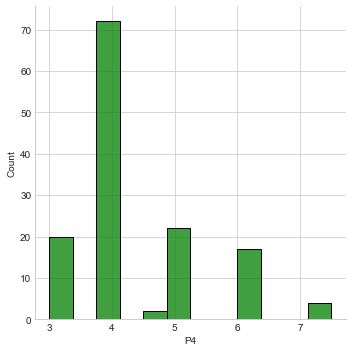

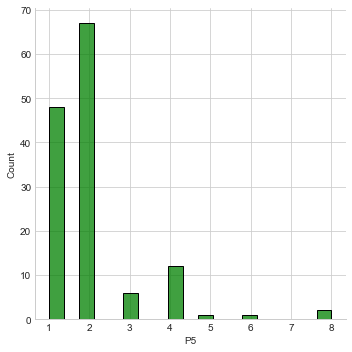

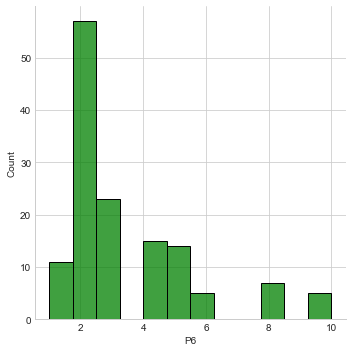

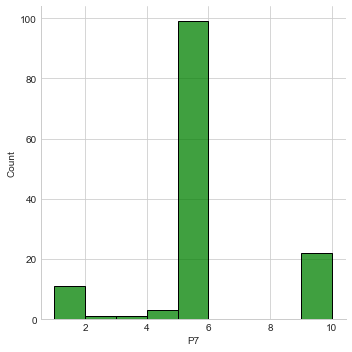

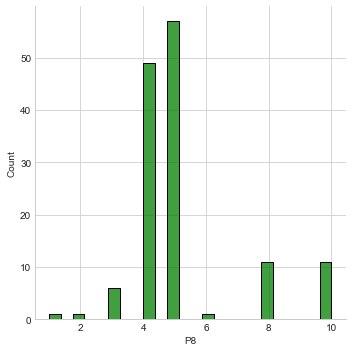

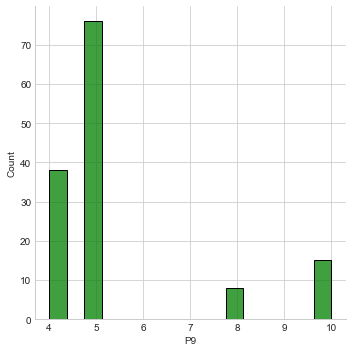

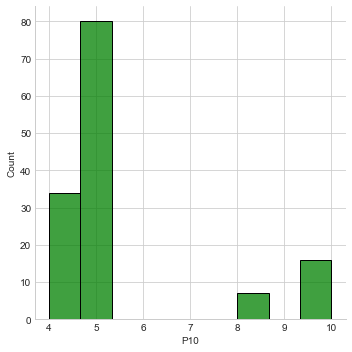

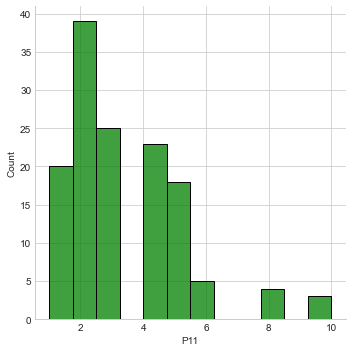

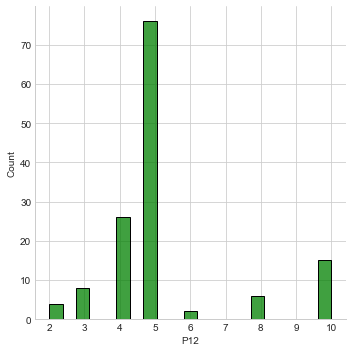

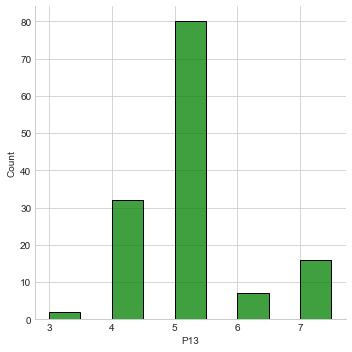

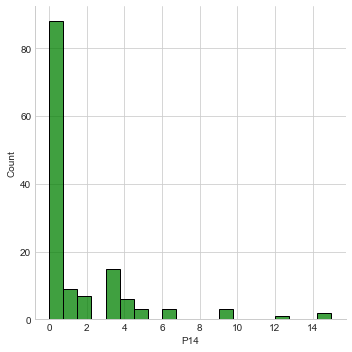

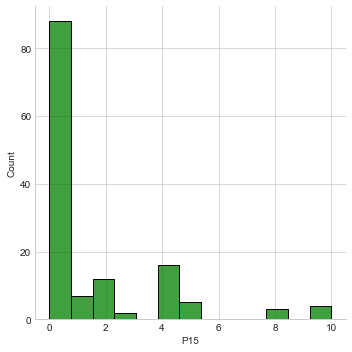

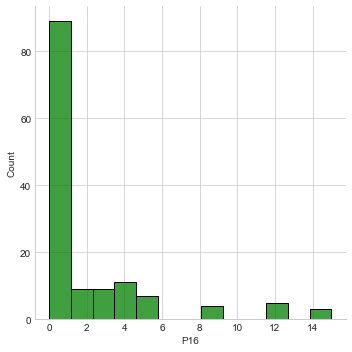

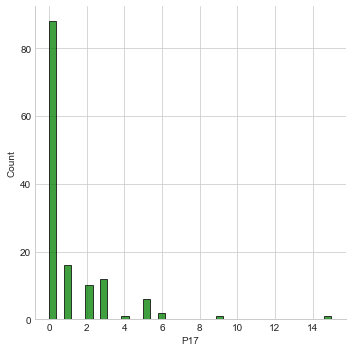

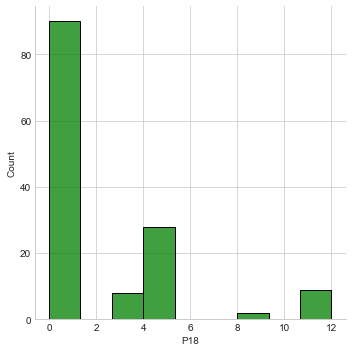

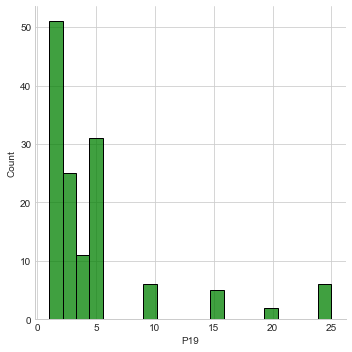

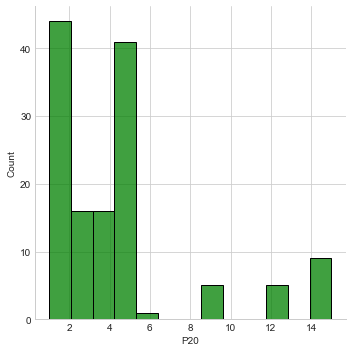

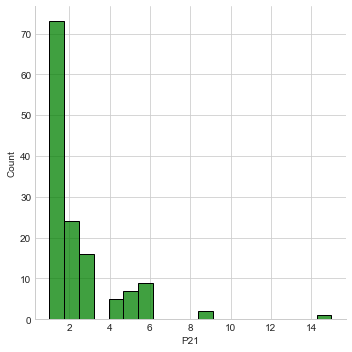

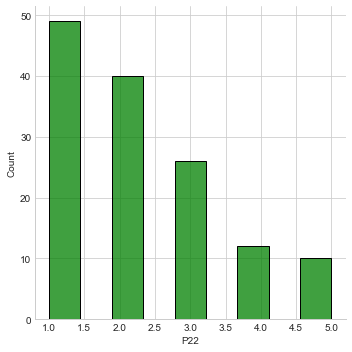

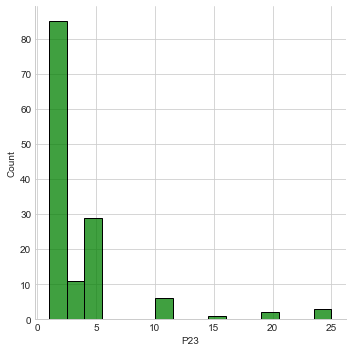

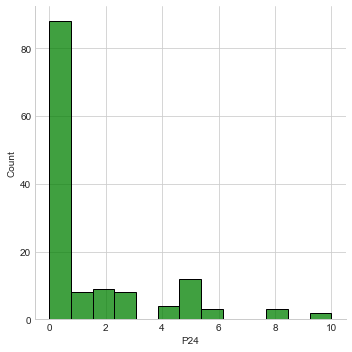

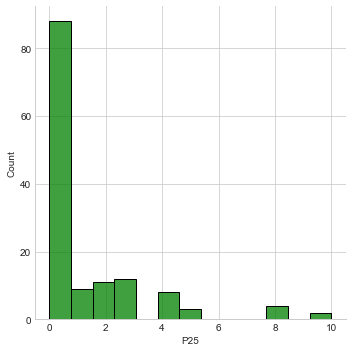

In [83]:
#plot along numeric columns
fig = plt.figure(figsize=(12,18))
for i in range(len(p_cols.columns)):
    fig.add_subplot(5,5,i+1)
    sns.displot(RestaurantRevenueTrain[p_cols.columns[i]],color="g", kde_kws={"shade": True})
    
plt.show()

In [ ]:
sns.distplot(np.log(data_train['revenue']))
plt.title('Skew : %.2f' % np.log(data_train['revenue']).skew())

# Modelling
### Visualizing clusters with PCA

let's test if the

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [ ]:
#first try training deaths-negative relationship
X=covid.death
y=covid.negative
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X

In [ ]:
#X['date']=X['date'].dt.strftime("%Y%m%d").astype(int)

In [ ]:
regressor = PCA(n_components=1)
regressor.fit(X.values.reshape(-1, 1))

In [ ]:
#no need to fillna because i did it in lines above

'''
for i in X.columns:
    X[i] = X[i].fillna(X[i].median())
'''

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X.values.reshape(-1, 1), y)
X_std


In [ ]:
model = sm.OLS()
results = model(X_train).fit(X_train)
print(results.summary())

# Conclusions